In [1]:
import math
import numpy as np
#import h5py
import matplotlib.pyplot as plt
#from matplotlib.pyplot import imread
#import scipy
#from PIL import Image
#i#ort pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
#from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()

In [3]:
Y_test_orig.shape

(10000, 1)

In [4]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig
Y_test = Y_test_orig

In [5]:
X_train = (X_train*2)-1
X_test =(X_test*2)-1


In [6]:
X_train[0]

array([[[-0.5372549 , -0.51372549, -0.50588235],
        [-0.6627451 , -0.63921569, -0.64705882],
        [-0.60784314, -0.62352941, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215686, -0.01960784, -0.2       ],
        [ 0.16078431, -0.02745098, -0.19215686]],

       [[-0.8745098 , -0.84313725, -0.84313725],
        [-1.        , -1.        , -1.        ],
        [-0.85882353, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980392, -0.56862745],
        [-0.06666667, -0.34901961, -0.60784314],
        [-0.04313725, -0.31764706, -0.55294118]],

       [[-0.80392157, -0.81176471, -0.83529412],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.61568627, -0.78823529, -0.9372549 ],
        ...,
        [-0.0745098 , -0.34117647, -0.60784314],
        [-0.05882353, -0.34117647, -0.60784314],
        [-0.14509804, -0.42745098, -0.67058824]],

       ...,

       [[ 0.63137255,  0.33333333, -0.24705882],
        [ 0

In [7]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape)) #CONTIENE UN NUMERO CON LA CLASE DE LOS 5000 DE ENTRENAMIENTO
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


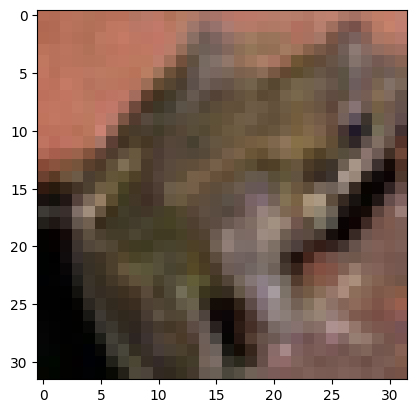

In [8]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [9]:
# Obtener las clases únicas
classes = np.unique(Y_train)

# Imprimir las clases
print("Clases del conjunto de datos CIFAR-10:")
for cls in classes:
    print(cls)

Clases del conjunto de datos CIFAR-10:
0
1
2
3
4
5
6
7
8
9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843137254902..0.9921568627450981].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8431372549019608..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9686274509803922..0.8352941176470587].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9921568627450981].


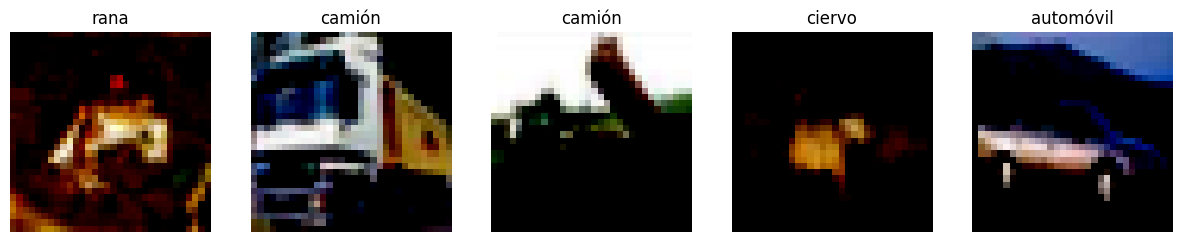

In [10]:
# Definir las clases correspondientes a cada número de etiqueta
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Visualizar las clases asociadas con algunas imágenes
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

for i in range(num_images):
    axes[i].imshow(X_train[i])
    axes[i].set_title(class_names[Y_train[i][0]])
    axes[i].axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9686274509803922..0.8352941176470587].


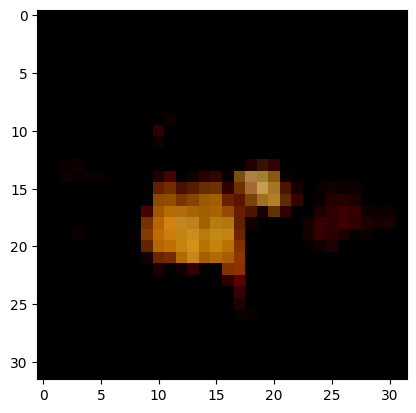

In [11]:
index = 3
plt.imshow(X_train[index]) #display sample training image
plt.show()

In [12]:
# Definir las clases que nos interesan (gato y perro) PARA HACERLO SOLO CON SIGMOID
avion_class = 0  #AVION
rana_class = 6  # RANA

# Filtrar las imágenes y etiquetas para quedarnos solo con los gatos y perros
avion_indices = (Y_train == avion_class).squeeze()
rana_indices = (Y_train == rana_class).squeeze()
avion_rana_indices = avion_indices | rana_indices

X_train_avion_rana = X_train[avion_rana_indices]
Y_train_avion_rana = Y_train[avion_rana_indices]

# Verificar las dimensiones del nuevo conjunto de datos
print("Dimensiones de X_train_cat_dog:", X_train_avion_rana.shape)
print("Dimensiones de Y_train_cat_dog:", Y_train_avion_rana.shape)

Dimensiones de X_train_cat_dog: (10000, 32, 32, 3)
Dimensiones de Y_train_cat_dog: (10000, 1)


In [13]:
# Definir las clases que nos interesan (gato y perro) PARA HACERLO SOLO CON SIGMOID
avion_class = 0  #AVION
rana_class = 6  # RANA

# Filtrar las imágenes y etiquetas para quedarnos solo con los gatos y perros
avion_indices = (Y_test == avion_class).squeeze()
rana_indices = (Y_test == rana_class).squeeze()
avion_rana_indices = avion_indices | rana_indices

X_test_avion_rana = X_test[avion_rana_indices]
Y_test_avion_rana = Y_test[avion_rana_indices]

# Verificar las dimensiones del nuevo conjunto de datos
print("Dimensiones de X_train_cat_dog:", X_test_avion_rana.shape)
print("Dimensiones de Y_train_cat_dog:", Y_test_avion_rana.shape)

Dimensiones de X_train_cat_dog: (2000, 32, 32, 3)
Dimensiones de Y_train_cat_dog: (2000, 1)


In [14]:
Y_train_avion_rana

array([[6],
       [6],
       [6],
       ...,
       [0],
       [0],
       [6]], dtype=uint8)

In [15]:
Y_train_avion_rana= np.where(Y_train_avion_rana == rana_class, 0, 1) # 1 avion 0 rana
Y_test_avion_rana = np.where(Y_test_avion_rana == rana_class, 0, 1)

In [16]:
Y_train_avion_rana

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8117647058823529..0.6862745098039216].


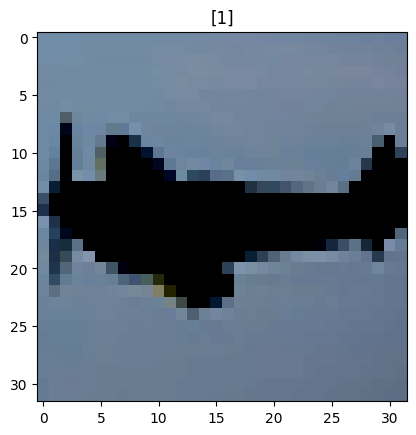

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


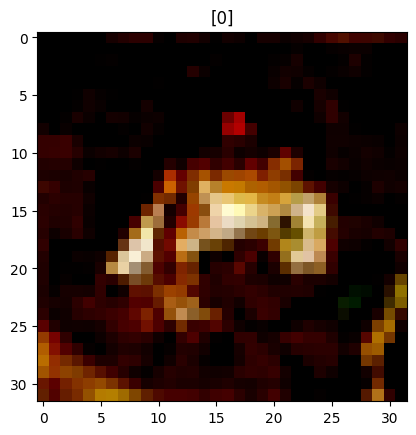

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843137254902..0.9450980392156862].


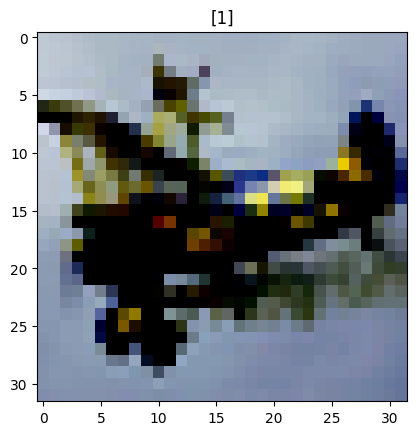

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8274509803921568].


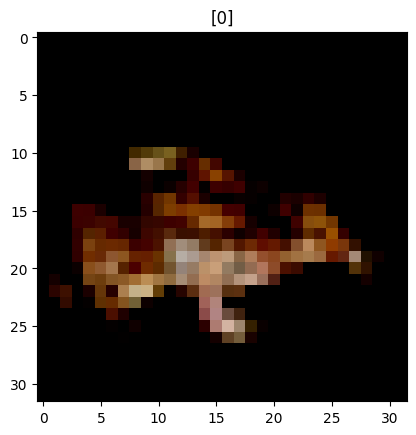

In [17]:
index = 65
plt.imshow(X_train_avion_rana[index]) #display sample training image
plt.title(Y_train_avion_rana[index])
plt.show()
index = 0
plt.imshow(X_train_avion_rana[index]) #display sample training image
plt.title(Y_train_avion_rana[index])
plt.show()
index = 530
plt.imshow(X_train_avion_rana[index]) #display sample training image
plt.title(Y_train_avion_rana[index])
plt.show()
index = 753
plt.imshow(X_train_avion_rana[index]) #display sample training image
plt.title(Y_train_avion_rana[index])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7411764705882353].


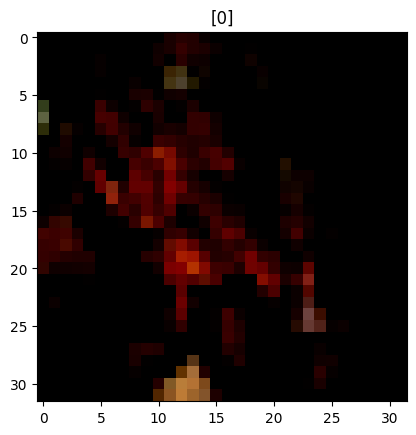

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7411764705882353..0.8352941176470587].


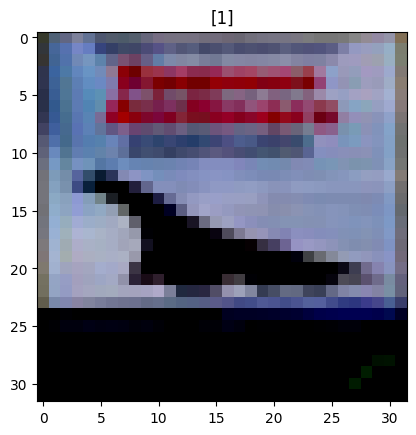

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


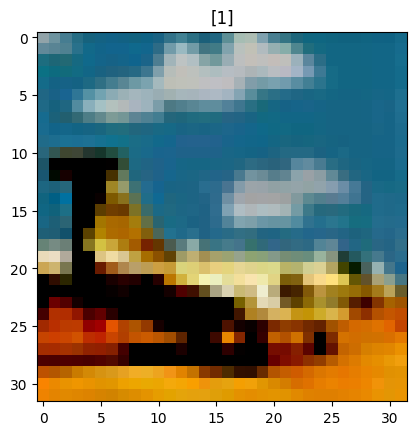

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9921568627450981..1.0].


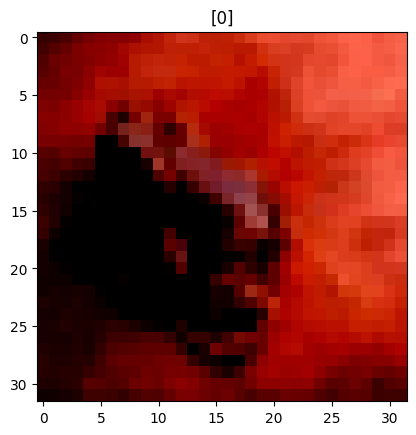

In [18]:
index = 65
plt.imshow(X_test_avion_rana[index]) #display sample training image
plt.title(Y_test_avion_rana[index])
plt.show()
index = 0
plt.imshow(X_test_avion_rana[index]) #display sample training image
plt.title(Y_test_avion_rana[index])
plt.show()
index = 530
plt.imshow(X_test_avion_rana[index]) #display sample training image
plt.title(Y_test_avion_rana[index])
plt.show()
index = 753
plt.imshow(X_test_avion_rana[index]) #display sample training image
plt.title(Y_test_avion_rana[index])
plt.show()

In [19]:
# GRADED FUNCTION: happyModel

def ModelCifar10_S_Inicial():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([

            tfl.ZeroPadding2D(padding=(0, 0),input_shape=(32,32,3)),
        

            #tfl.Conv2D(filters=2, kernel_size=7, strides=(5,5), input_shape=[32, 32, 3]), # de (32+2*0-5)/9+1=3+1=4 (4,4,2)
            tfl.Conv2D(filters=2, kernel_size=5, strides=(9,9), input_shape=[32, 32, 3]), # de (32+2*0-5)/9+1=3+1=4 (4,4,2)
        

            ## ReLU
            tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
            ## Max Pooling 2D with default parameters
        
            tfl.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), #(2,2,2)
            
            ## Flatten layer
        
            tfl.Flatten(), #de 8
            #tfl.Dense(5,activation="sigmoid"),
            #tfl.Dense(4,activation="sigmoid"),
            tfl.Dense(1,activation="sigmoid")

        ])
    
    return model

In [20]:
def ModelCifar10_Inicial():
    # Establecer semillas aleatorias para NumPy
    tf.random.set_seed(64)
    # Define la entrada
    input_layer = tf.keras.Input(shape=(32, 32, 3))

    # Aplica el relleno, en este caso no se realiza padding
    padded_input = tfl.ZeroPadding2D(padding=(0, 0))(input_layer)

    # Aplica la convolución, 2 Filtros de tamaño 5x5x3 y un Stride de 9
    conv_output = tfl.Conv2D(filters=2, kernel_size=5, strides=(9, 9))(padded_input)

    # Aplica ReLU (mantiene valor si el valor es positivo, 0 en caso contrario)
    relu_output = tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(conv_output)

    # Aplica MaxPooling 2x2
    pooling_output = tfl.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)(relu_output)

    # Aplana la salida, proceso flatten
    flattened_output = tfl.Flatten()(pooling_output)

    # Capa completamente conectada, con función de activación sigmoid ('0' RANA,'1' AVION)
    dense_output = tfl.Dense(1, activation="sigmoid")(flattened_output)

    # Se crea modelo
    model = tf.keras.Model(inputs=input_layer, outputs=dense_output)

    return model



In [21]:
cifar10_model_avion_rana_S = ModelCifar10_S_Inicial()
# Print a summary for each layer
#for layer in summary(cifar10_model_avion_rana_S):
#    print(layer)

cifar10_model_avion_rana = ModelCifar10_Inicial()
# Print a summary for each layer
#for layer in summary(cifar10_model_avion_rana):
#    print(layer)

C:\Users\Jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from tensorflow.keras.optimizers import Adam
#optimizer = Adam(learning_rate=0.0025) 
#optimizer = Adam(learning_rate=0.005)
optimizer = Adam(learning_rate=0.01) 
cifar10_model_avion_rana.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [23]:
cifar10_model_avion_rana.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 2)             │             152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 4, 4, 2)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 2)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Establecer semillas aleatorias para NumPy
#np.random.seed(64)

# Establecer semillas aleatorias para TensorFlow
#tf.random.set_seed(64)
cifar10_model_avion_rana.fit(X_train_avion_rana, Y_train_avion_rana, epochs=20, batch_size=512)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7105 - loss: 0.5749
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8427 - loss: 0.3859
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8619 - loss: 0.3437
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.3350
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8696 - loss: 0.3285
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3244 
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8737 - loss: 0.3218
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8755 - loss: 0.3197
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.3181
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8739 - loss: 0.3169 
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8745 - loss: 0.3160 
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8744 -

In [25]:
cifar10_model_avion_rana.evaluate(X_test_avion_rana,Y_test_avion_rana)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8680 - loss: 0.3193


[0.30582547187805176, 0.875]

In [26]:
# Obtener los pesos y sesgos de cada capa
for layer in cifar10_model_avion_rana.layers:
    print("Capa:", layer.name)
    weights = layer.get_weights()
    if weights:
        for i, w in enumerate(weights):
            print("  Pesos {}:".format(i), w.shape)
    else:
        print("  No tiene pesos")

Capa: input_layer_1
  No tiene pesos
Capa: zero_padding2d_1
  No tiene pesos
Capa: conv2d_1
  Pesos 0: (5, 5, 3, 2)
  Pesos 1: (2,)
Capa: re_lu_1
  No tiene pesos
Capa: max_pooling2d_1
  No tiene pesos
Capa: flatten_1
  No tiene pesos
Capa: dense_1
  Pesos 0: (8, 1)
  Pesos 1: (1,)


In [27]:
for layer in cifar10_model_avion_rana.layers:
    print("Capa:", layer.name)
    weights = layer.get_weights()
    if weights:
        for i, w in enumerate(weights):
            print("  Pesos {}:".format(i))
            print(w)
    else:
        print("  No tiene pesos")

Capa: input_layer_1
  No tiene pesos
Capa: zero_padding2d_1
  No tiene pesos
Capa: conv2d_1
  Pesos 0:
[[[[ 0.09489175  0.04248793]
   [-0.21986748  0.11528973]
   [-0.24822904 -0.3742617 ]]

  [[ 0.07329325 -0.11831302]
   [-0.25326914  0.12474958]
   [ 0.15061736 -0.16324134]]

  [[-0.12368644 -0.0648372 ]
   [-0.15947312  0.28099555]
   [ 0.3189046  -0.22454481]]

  [[-0.11335918  0.0054663 ]
   [ 0.00089992  0.03639586]
   [ 0.22160986 -0.19432163]]

  [[-0.3906514  -0.3769483 ]
   [-0.00528557 -0.26289117]
   [ 0.29670864 -0.12631798]]]


 [[[-0.33681348  0.09172825]
   [-0.16081673  0.16581537]
   [ 0.21905851 -0.2030355 ]]

  [[-0.12047093 -0.09428693]
   [ 0.07859353  0.27136704]
   [ 0.16177057 -0.2805683 ]]

  [[-0.22638658 -0.15526883]
   [ 0.00447676  0.23780645]
   [ 0.2707853   0.10154278]]

  [[ 0.13845755 -0.03521867]
   [-0.15917781  0.06448186]
   [ 0.06919786 -0.12357824]]

  [[-0.2633065  -0.04536554]
   [ 0.00757756  0.02186956]
   [ 0.35337114 -0.17318973]]]


 [[

In [28]:
conv_weights = cifar10_model_avion_rana.layers[2].get_weights()
conv_weights


[array([[[[ 0.09489175,  0.04248793],
          [-0.21986748,  0.11528973],
          [-0.24822904, -0.3742617 ]],
 
         [[ 0.07329325, -0.11831302],
          [-0.25326914,  0.12474958],
          [ 0.15061736, -0.16324134]],
 
         [[-0.12368644, -0.0648372 ],
          [-0.15947312,  0.28099555],
          [ 0.3189046 , -0.22454481]],
 
         [[-0.11335918,  0.0054663 ],
          [ 0.00089992,  0.03639586],
          [ 0.22160986, -0.19432163]],
 
         [[-0.3906514 , -0.3769483 ],
          [-0.00528557, -0.26289117],
          [ 0.29670864, -0.12631798]]],
 
 
        [[[-0.33681348,  0.09172825],
          [-0.16081673,  0.16581537],
          [ 0.21905851, -0.2030355 ]],
 
         [[-0.12047093, -0.09428693],
          [ 0.07859353,  0.27136704],
          [ 0.16177057, -0.2805683 ]],
 
         [[-0.22638658, -0.15526883],
          [ 0.00447676,  0.23780645],
          [ 0.2707853 ,  0.10154278]],
 
         [[ 0.13845755, -0.03521867],
          [-0.15917781,

In [29]:
conv_weights = cifar10_model_avion_rana.layers[6].get_weights()
conv_weights

[array([[ 0.512535  ],
        [-0.6046249 ],
        [ 0.61955935],
        [-0.6961213 ],
        [-0.03945307],
        [ 0.33706686],
        [-0.16652331],
        [ 0.01339718]], dtype=float32),
 array([0.29017198], dtype=float32)]